In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from matplotlib import ticker
from pathlib import Path

In [2]:
path_to_data = 'data\\Prepared data\\Run2\\X_data_hierarhical.xlsx' # куда сохранять X часть выборки
val_count = 8

In [3]:
def get_df(path: str):
    df = pd.read_excel(path,index_col=[0,1])
    return df

In [4]:
# Чтение данных из файла
first_df = get_df(path_to_data)

In [5]:
# Что прочли из файла
display(first_df)

detector_0  detector_1  detector_2  detector_3  detector_4  \
Row Data point                                                               
0   0               25.800      25.600      25.300      25.600      25.900   
    1               26.100      25.800      25.500      25.800      26.200   
    2               26.200      25.900      25.700      25.900      26.300   
    3               26.300      26.100      25.800      26.100      26.500   
    4               26.500      26.200      26.000      26.200      26.600   
...                    ...         ...         ...         ...         ...   
114 59              32.496      36.661      33.466      14.967      41.569   
    60             -34.871     -30.984     -40.000      13.856     -34.871   
    61             -35.327     -33.941      35.327     -16.000     -37.947   
    62              35.327      31.496     -34.871     -13.856      37.947   
    63               0.000       0.000       0.000       0.000       0.000   

                detector_5  detector_6  detector_7  detector_8  detector_9  \
Row Data point                                                               
0   0               25.800      25.500      25.500      25.600      25.600   
    1               26.100      25.700      25.700      25.900      25.900   
    2               26.200      25.800      25.700      26.000      26.000   
    3               26.300      25.900      25.900      26.100      26.100   
    4               26.400      26.100      26.000      26.300      26.200   
...                    ...         ...         ...         ...         ...   
114 59              43.081      38.367      14.967     -33.466     -43.081   
    60             -35.777     -36.661     -13.856      33.466      40.000   
    61             -40.398      32.496     -13.856     -40.398     -39.192   
    62              40.000     -32.496     -13.856      38.781      36.222   
    63               0.000       0.000       0.000       0.000       0.000   

                ...  detector_390  detector_391  detector_392  detector_393  \
Row Data point  ...                                                           
0   0           ...        25.500        25.900        25.800        25.600   
    1           ...        25.700        26.100        25.900        25.800   
    2           ...        25.800        26.200        26.100        25.900   
    3           ...        25.900        26.400        26.300        26.100   
    4           ...        26.100        26.500        26.400        26.300   
...             ...           ...           ...           ...           ...   
114 59          ...        27.129       -29.394       -33.466        36.222   
    60          ...        17.889        30.463        28.844       -27.713   
    61          ...       -21.909       -21.909       -29.933       -28.284   
    62          ...        18.762        22.627        29.394        28.284   
    63          ...         0.000         0.000         0.000         0.000   

                detector_394  detector_395  detector_396  detector_397  \
Row Data point                                                           
0   0                 25.600        25.600        25.500        25.300   
    1                 25.700        25.800        25.600        25.500   
    2                 25.900        26.000        25.800        25.600   
    3                 26.000        26.100        25.900        25.700   
    4                 26.100        26.200        26.000        25.900   
...                      ...           ...           ...           ...   
114 59                39.192       -38.781        42.708       -40.792   
    60               -32.000        37.523       -35.327        37.947   
    61               -36.222       -33.941       -40.398       -36.222   
    62                34.409        33.466        39.192        32.985   
    63                 0.000         0.000         0.000         0.000

In [6]:
first_df = first_df.loc[(slice(0,115),slice(0,64)), ~(first_df == '--').any()]

In [7]:
colormaps_list = list()

for i in range(val_count):
    colormaps_list.append(first_df.loc[(slice(0,115),[i]),:].to_numpy().astype(float))

In [8]:
for i in range(val_count):
    print(colormaps_list[i].shape)

(115, 397)
(115, 397)
(115, 397)
(115, 397)
(115, 397)
(115, 397)
(115, 397)
(115, 397)


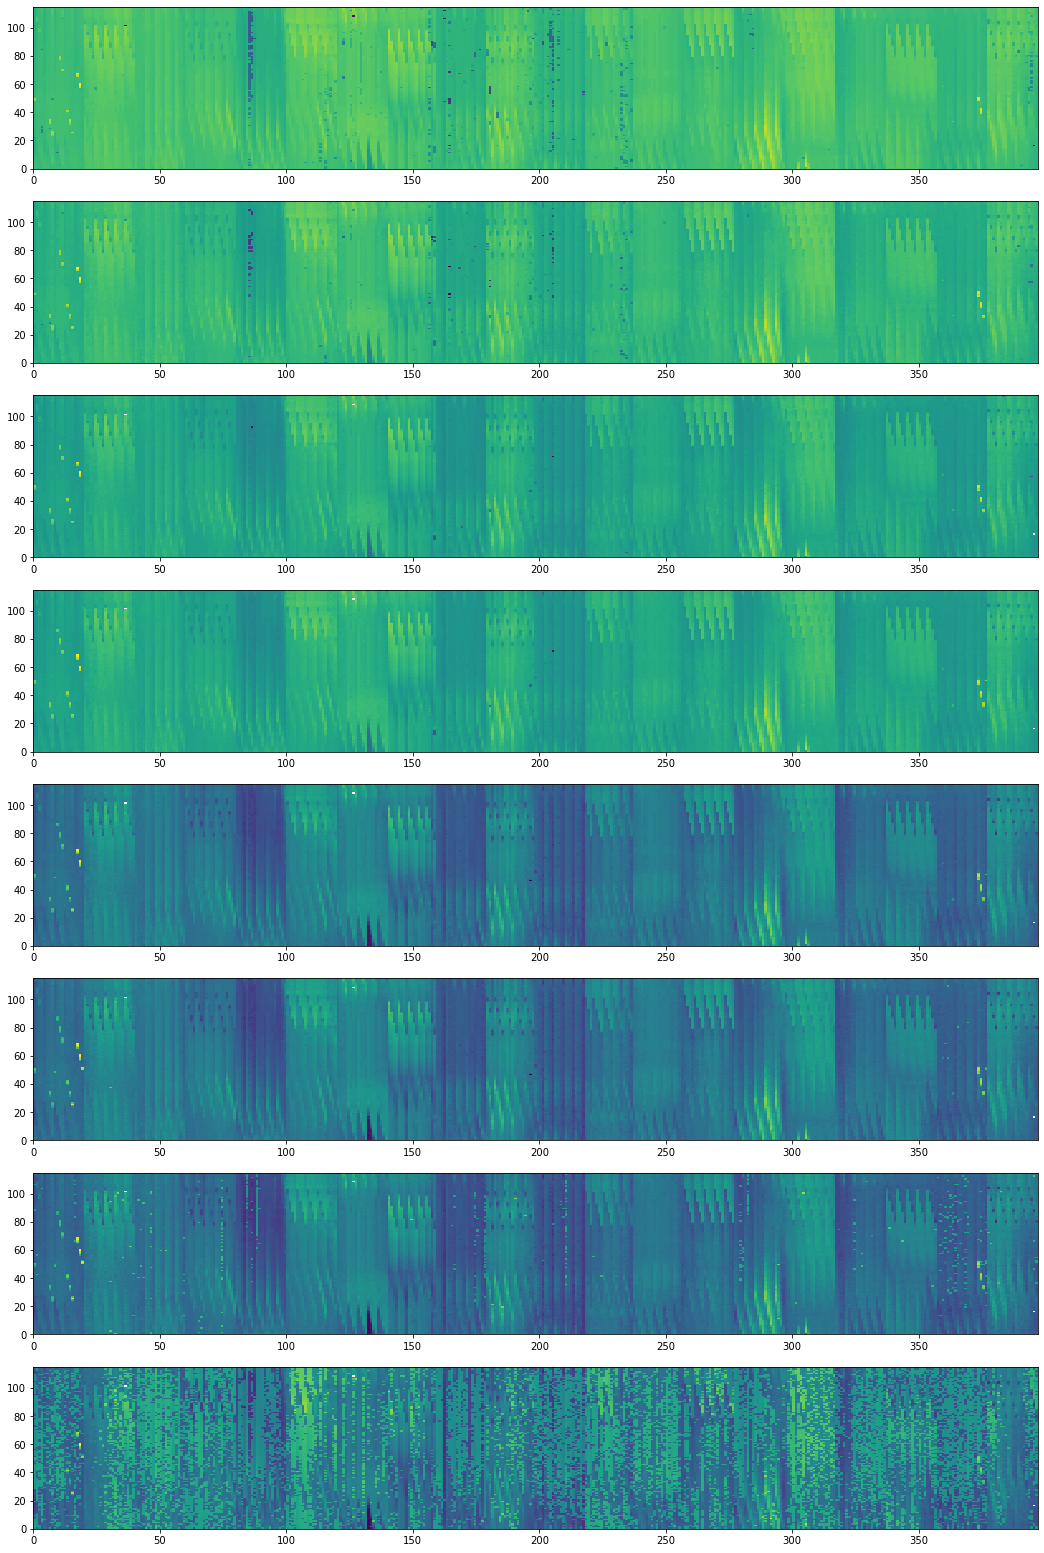

In [9]:
fig, ax = plt.subplots(val_count,1)

fig.set_figwidth(18)
fig.set_figheight(28)

for item, colormap in zip(ax, colormaps_list):
    item.pcolormesh(colormap)
    
plt.show()

In [10]:
#df = first_df.loc[(slice(0,115),[0]),:]
#df = df.loc[(slice(0,115),[0]), ~(df == '--').any()]

In [11]:
#display(df.loc[(slice(0,115),[0]), 'detector_222'])

In [12]:
#fig, ax = plt.subplots()

#fig.set_figwidth(18)
#fig.set_figheight(8)

#plt.pcolormesh(df.to_numpy().astype(float))
#plt.show()